/opt/software/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/tmp/ipykernel_433/807026719.py:66: RuntimeWarning: overflow encountered in expm1
  y_pred_test_linear_exp = np.clip(np.expm1(y_pred_test_linear), 0, np.max(y_test_exp))


[ 559. 1690. 1255. 1154.  530.  627.  884.  578.  779. 1149.  723. 1081.
 1844.  482.  261. 1303.  859. 1111. 1303.  367. 1738. 2019. 1217. 1149.
  528.  752. 1154. 1063. 1164. 1400. 1014.  661.  917. 1487. 1536. 1824.
  773. 1169.  744. 2868. 1440. 2154.  769. 1536. 1110. 1145. 1011. 1506.
 1149. 1024. 1569. 1043.  940.  395. 1151. 1154. 1187. 1303.  717. 1667.
 1027.  976.  818.  203. 1377. 1014.  966. 2032. 1419. 1493. 2213.  278.
 2532.  946. 1057.  946. 2178.  681.  482.  433. 1255. 1758. 1034.  964.
  540.  956. 1864. 1409. 3841.  771. 1284. 1256.  465. 1158. 1158. 1053.
 1656.  636.  944. 2415.  521.  908. 1352. 3131.  624. 1980.  724.  996.
 1444. 1158.  594.  374.  380.  334. 1545.  790. 1545.  772.  617. 1545.
  483. 2222. 1097. 1127.  202. 2801. 1158. 1365. 1460.  837.  384. 1294.
 1642.  743.  414. 1903.  530. 1332. 2657.  994. 2151. 1268.  189. 1633.
 1462.  506.  420. 1613.  462. 1831.  955. 1091.  607. 1981.  268.  726.
  595. 1062. 3817.  757. 2318. 2099. 2358. 1104. 15

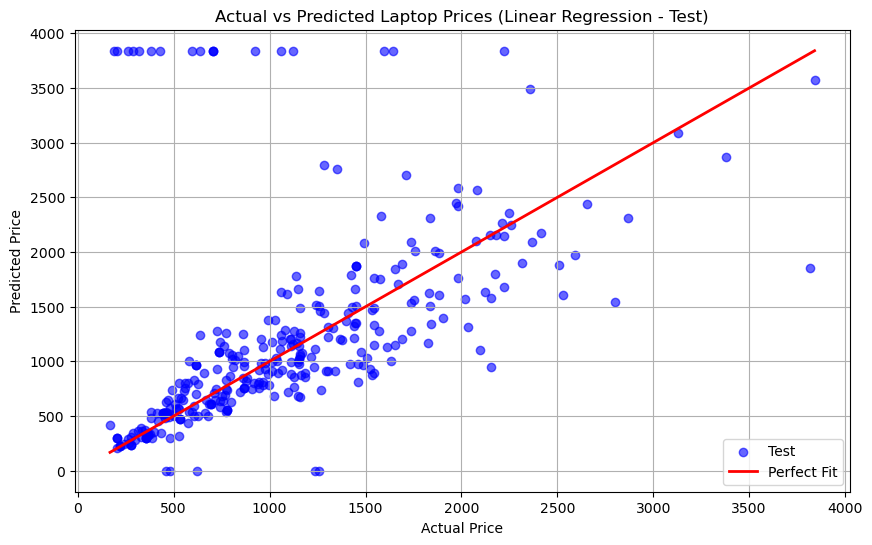

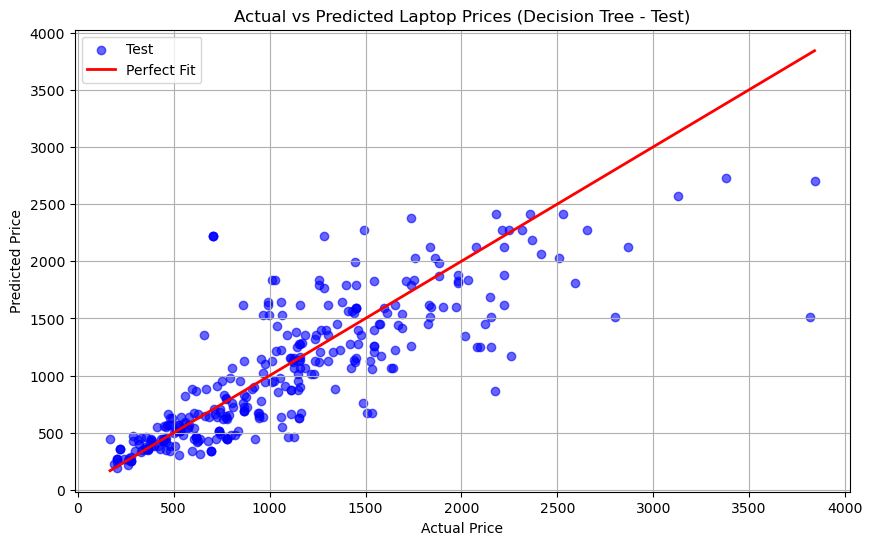

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df_train = pd.read_csv('laptop_train.csv')

# Data feature engineering for training dataset
df_train['Screen Size'] = df_train['Screen Size'].str.replace('"', '').astype(float)
df_train['RAM'] = df_train['RAM'].str.replace('GB', '').astype(int)

# Log-transform the target variable to reduce the impact of outliers
df_train['Price'] = np.log1p(df_train['Price'])

# Define the categorical and continuous columns
categorical_cols = ['Manufacturer', 'Category', 'Screen', 'CPU', ' Storage', 'GPU', 'Operating System']
continuous_cols = ['Screen Size', 'RAM', 'Price']

# One-hot encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
encoded_categorical_train = encoder.fit_transform(df_train[categorical_cols])

# Min-Max scaling for continuous features
scaler = MinMaxScaler()
continuous_features_train = df_train[continuous_cols].drop(columns=['Price'])
scaled_continuous_train = scaler.fit_transform(continuous_features_train)

# Combine the encoded categorical features and scaled continuous features for training
X_train = np.hstack([encoded_categorical_train, scaled_continuous_train])
y_train = df_train['Price'].values

# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Now, load the test dataset
df_test = pd.read_csv('laptop_test.csv')

# Data feature engineering for test dataset
df_test['Screen Size'] = df_test['Screen Size'].str.replace('"', '').astype(float)
df_test['RAM'] = df_test['RAM'].str.replace('GB', '').astype(int)

# Log-transform the price for the test dataset
df_test['Price'] = (df_test['Price'])

# One-hot encoding for categorical features in the test set
encoded_categorical_test = encoder.transform(df_test[categorical_cols])

# Scaling the continuous features for the test set
continuous_features_test = df_test[continuous_cols].drop(columns=['Price'])
scaled_continuous_test = scaler.transform(continuous_features_test)

# Combine the encoded categorical features and scaled continuous features for test set
X_test = np.hstack([encoded_categorical_test, scaled_continuous_test])
y_test = df_test['Price'].values

# Apply a limit to the predicted values, ensuring no NaN or infinities are present
y_pred_test_linear_exp = np.clip(np.expm1(y_pred_test_linear), 0, np.max(y_test_exp))
y_pred_train_linear_exp = np.clip(np.expm1(y_pred_train_linear), 0, np.max(y_train_exp))

# Similarly for the Decision Tree predictions
y_pred_test_tree_exp = np.clip(np.expm1(y_pred_test_tree), 0, np.max(y_test_exp))
y_pred_train_tree_exp = np.clip(np.expm1(y_pred_train_tree), 0, np.max(y_train_exp))

# Recalculate the MSE and R² scores
mse_train_linear = mean_squared_error(y_train_exp, y_pred_train_linear_exp, squared=False)
mse_test_linear = mean_squared_error(y_test_exp, y_pred_test_linear_exp, squared=False)

mse_train_tree = mean_squared_error(y_train_exp, y_pred_train_tree_exp, squared=False)
mse_test_tree = mean_squared_error(y_test_exp, y_pred_test_tree_exp, squared=False)

# Calculate R² score for both models
r2_train_linear = r2_score(y_train_exp, y_pred_train_linear_exp)
r2_train_tree = r2_score(y_train_exp, y_pred_train_tree_exp)
r2_test_linear = r2_score(y_test_exp, y_pred_test_linear_exp)  #I can't seem to figure out why it gives me a negative accuracy
r2_test_tree = r2_score(y_test_exp, y_pred_test_tree_exp)

print(y_test_exp)
print(y_pred_test_linear_exp)
# Display results
print(f'MSE (Linear Regression - Train): {mse_train_linear}')
print(f'R² (Linear Regression - Train): {r2_train_linear * 100:.2f}%')
print(f'MSE (Linear Regression - Test): {mse_test_linear}')
print(f'R² (Linear Regression - Test): {r2_test_linear * 100:.2f}%')

print(f'MSE (Decision Tree - Train): {mse_train_tree}')
print(f'R² (Decision Tree - Train): {r2_train_tree * 100:.2f}%')
print(f'MSE (Decision Tree - Test): {mse_test_tree}')
print(f'R² (Decision Tree - Test): {r2_test_tree * 100:.2f}%')

# Plotting Linear Regression results for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_test_linear_exp, alpha=0.6, color='b', label="Test")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='r', lw=2, label="Perfect Fit")
plt.title('Actual vs Predicted Laptop Prices (Linear Regression - Test)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Decision Tree results for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_test_tree_exp, alpha=0.6, color='b', label="Test")
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='r', lw=2, label="Perfect Fit")
plt.title('Actual vs Predicted Laptop Prices (Decision Tree - Test)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()
